In [0]:
# STEP 1

# #This section is base copy from google's sample import of tensorflow, keras, ploting and support libraries

#keras install libraries
!pip install -q keras
!pip install -q tqdm

#openCV is used to process and filter images
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [4]:
# STEP 2
# In this step we import the libraries needed to import files from google drive

# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.21-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
# STEP 3
# Generate auth tokens for Colab

# CLICK THE LINK GENERATED THEN COPY AND PASTE THE KEY INTO THE FIELD AND CLICK ENTER

from google.colab import auth
auth.authenticate_user()

In [7]:
# STEP 4
# Here we connect to your google drive folder.
# You can download sample puppy and rabbit images using this link: https://drive.google.com/drive/folders/1RcWFv-PDtGK4n1JgkAgL77fB-N0I4oMP?usp=sharing

# WARNING YOU MAY NEED TO RUN THIS CELL MULTIPLE TIMES TO GET A CONNECTION + KEY ESTABLISHED to your google drive.

# CLICK THE 1st LINK GENERATED THEN COPY AND PASTE THE KEY INTO THE FIELD AND CLICK ENTER

# RE-RUN THIS CELL AND CLICK THE 2nd LINK GENERATED THEN COPY AND PASTE THE KEY INTO THE FIELD AND CLICK ENTER

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
vcode = getpass.getpass()

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.
··········


In [8]:
# STEP 5
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive
# print 'Files in Drive:'
!ls drive/

 Classification  'Colab Notebooks'   new	 Video.zip
 CnnModel.ipynb  'Getting started'   softwares


In [0]:
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU

In [10]:
train_data_path = 'drive/Classification/train/'
validation_data_path = 'drive/Classification/test/'
!ls 'drive/Classification/test/'/

Arslan	Fasih  Mehraj


In [16]:

epochs =  30
train_data_path = 'drive/Classification/train/'
validation_data_path = 'drive/Classification/test/'

"""
Parameters
"""
img_width, img_height = 64, 64
batch_size =  4
samples_per_epoch = 40
validation_steps = 400
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 3
lr = 0.001
 
model = Sequential()
model.add(Convolution2D(nb_filters1, conv1_size, conv1_size, border_mode ="same", input_shape=(img_width, img_height, 3)))
#model.add(Activation("relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(nb_filters2, conv2_size, conv2_size, border_mode ="same"))
#model.add(Activation("relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))


model.add(Convolution2D(nb_filters1, conv1_size, conv1_size, border_mode ="same"))
#model.add(Activation("relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))


 
#model.add(MaxPooling2D(pool_size=(pool_size, pool_size), dim_ordering='th'))




model.add(Flatten())
model.add(Dense(256))
#model.add(Activation("relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

 


#target_dir = 'drive/train model/'
#if not os.path.exists(target_dir):
 # os.mkdir(target_dir)
#model.save('drive/train model/model.h5')
#model.save_weights('drive/train model/weights.h5')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`


Found 767 images belonging to 3 classes.
Found 192 images belonging to 3 classes.


In [17]:
print(train_generator)

In [18]:

model.fit_generator(
    generator=train_generator,
    samples_per_epoch=samples_per_epoch,
    epochs=epochs,
    validation_data=validation_generator, 
     validation_steps=validation_steps )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras.pre..., epochs=30, validation_data=<keras.pre..., validation_steps=400, steps_per_epoch=10)`
  import sys


Epoch 1/30
10/10 [==============================] - 16s 2s/step - loss: 1.2395 - accuracy: 0.2750 - val_loss: 1.1216 - val_accuracy: 0.2169
Epoch 2/30
10/10 [==============================] - 15s 1s/step - loss: 1.0720 - accuracy: 0.4000 - val_loss: 1.3147 - val_accuracy: 0.4062
Epoch 3/30
10/10 [==============================] - 15s 2s/step - loss: 0.9179 - accuracy: 0.4500 - val_loss: 0.9750 - val_accuracy: 0.3988
Epoch 4/30
10/10 [==============================] - 28s 3s/step - loss: 1.1124 - accuracy: 0.5385 - val_loss: 1.2232 - val_accuracy: 0.4344
Epoch 5/30
10/10 [==============================] - 51s 5s/step - loss: 1.0127 - accuracy: 0.4000 - val_loss: 0.8616 - val_accuracy: 0.6044
Epoch 6/30
10/10 [==============================] - 15s 1s/step - loss: 1.0531 - accuracy: 0.5750 - val_loss: 0.8497 - val_accuracy: 0.7606
Epoch 7/30
10/10 [==============================] - 15s 2s/step - loss: 0.8689 - accuracy: 0.6500 - val_loss: 0.5806 - val_accuracy: 0.4819
Epoch 8/30
10/10 [==

In [19]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("drive/mymodel/modelm.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("drive/mymodel/model.h5")
print("Saved model to disk")

Saved model to disk


Label: arslan  Orignal arslan 2.jpeg
Label: arslan


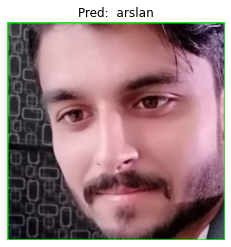

Label: arslan  Orignal arslan 3.jpeg
Label: arslan


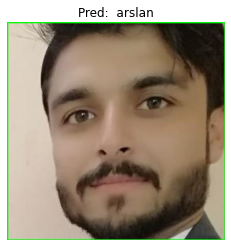

Label: arslan  Orignal fasih 2.jpg
Label: fasih


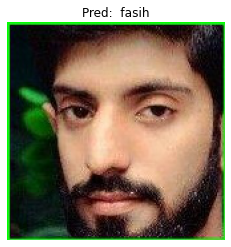

Label: arslan  Orignal arslan 4.jpeg
Label: arslan


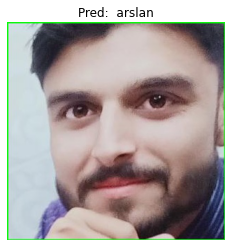

Label: arslan  Orignal arslan 6.jpeg
Label: arslan


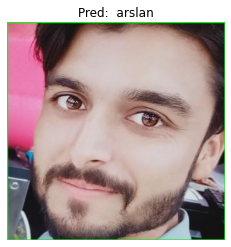

Label: arslan  Orignal arslan 5.jpeg
Label: arslan


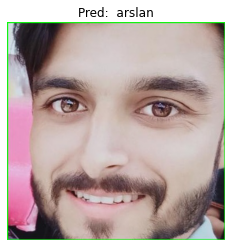

Label: arslan  Orignal fasih 7.jpg
Label: fasih


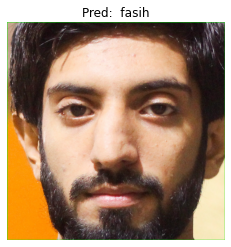

Label: arslan  Orignal fasih 6.JPG
Label: fasih


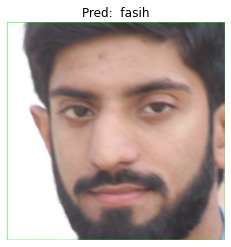

Label: arslan  Orignal fasih 4.jpg
Label: fasih


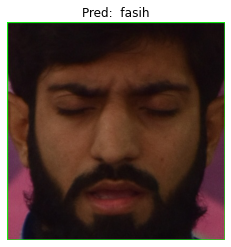

Label: arslan  Orignal mehraj 2.jpeg
Label: mehraj


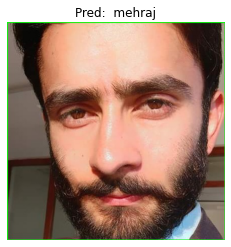

Label: arslan  Orignal mehraj 11.jpeg
Label: mehraj


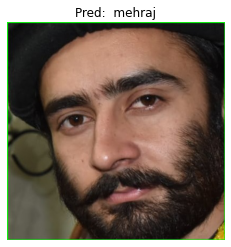

Label: arslan  Orignal fasih 9.jpg
Label: fasih


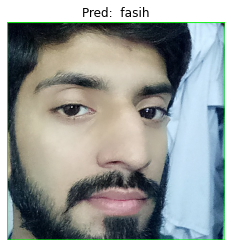

Label: arslan  Orignal fasih 8.jpg
Label: fasih


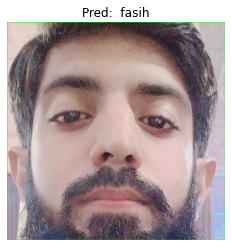

Label: arslan  Orignal mehraj 3.jpeg
Label: arslan


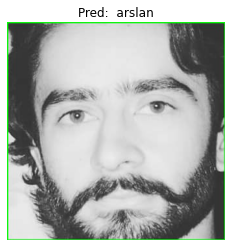

Label: arslan  Orignal mehraj 7.jpeg
Label: mehraj


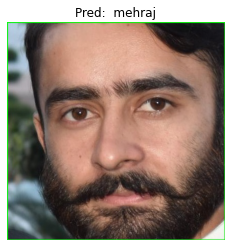

Label: arslan  Orignal mehraj 5.jpeg
Label: fasih


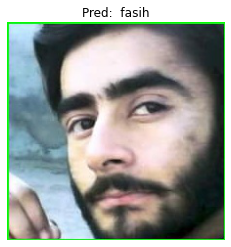

Label: arslan  Orignal mehraj 8.jpeg
Label: mehraj


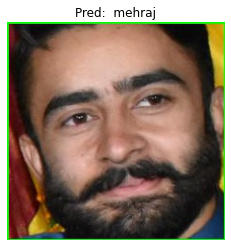

Label: arslan  Orignal mehraj 9.jpeg
Label: arslan


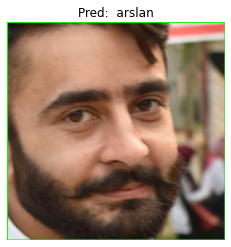

Label: fasih
Label: fasih


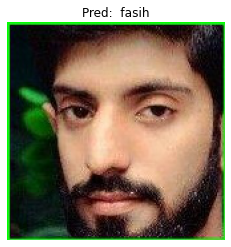

Label: fasih
Label: arslan


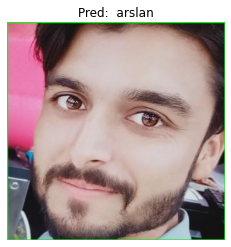

Label: fasih
Label: arslan


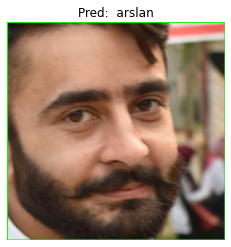

Label: fasih
Label: fasih


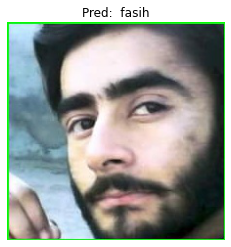

Label: fasih
Label: arslan


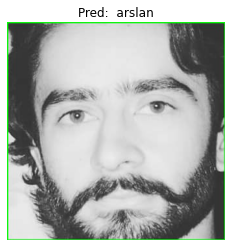

Label: fasih
Label: mehraj


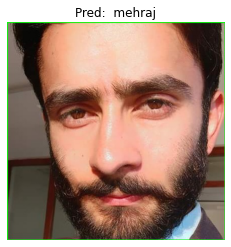

Label: fasih
Label: arslan


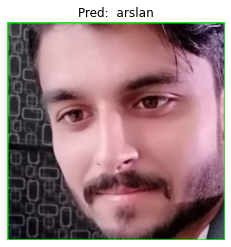

Label: fasih
Label: mehraj


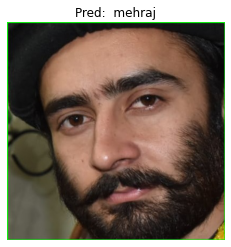

Label: fasih
Label: arslan


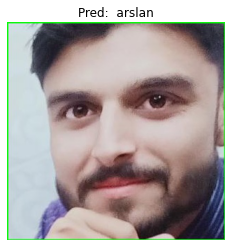

Label: fasih
Label: arslan


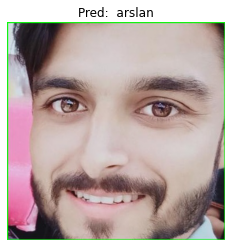

Label: fasih
Label: fasih


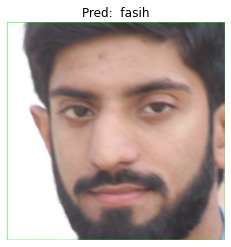

Label: fasih
Label: arslan


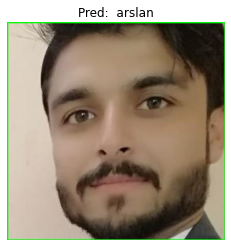

Label: fasih
Label: mehraj


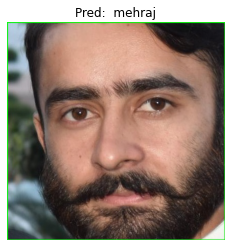

Label: fasih
Label: fasih


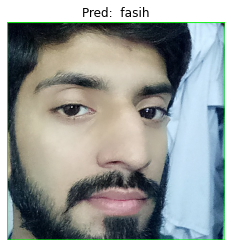

Label: fasih
Label: mehraj


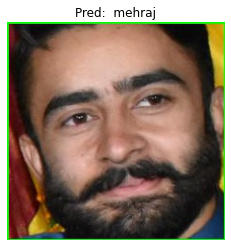

Label: fasih
Label: fasih


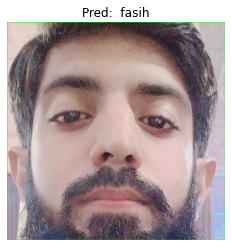

Label: fasih
Label: fasih


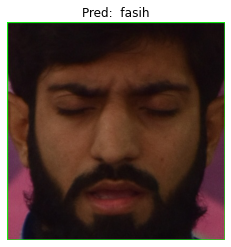

Label: fasih
Label: fasih


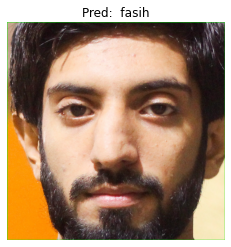

Label: mehraj
Label: fasih


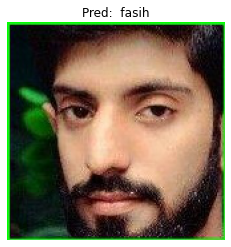

Label: mehraj
Label: arslan


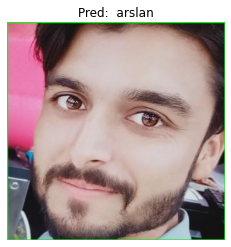

Label: mehraj
Label: arslan


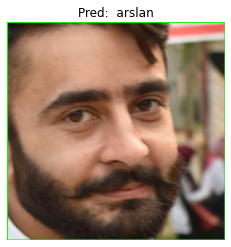

Label: mehraj
Label: fasih


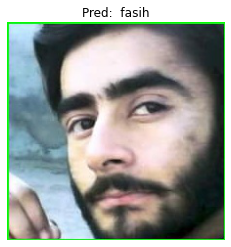

Label: mehraj
Label: arslan


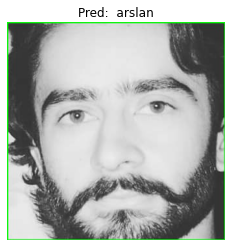

Label: mehraj
Label: mehraj


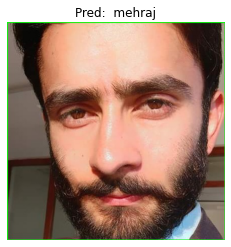

Label: mehraj
Label: arslan


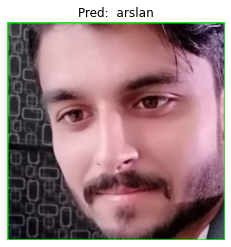

Label: mehraj
Label: mehraj


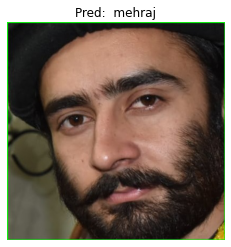

Label: mehraj
Label: arslan


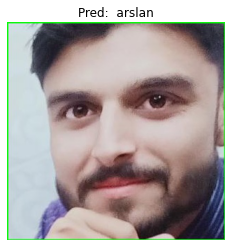

Label: mehraj
Label: arslan


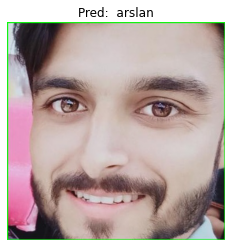

Label: mehraj
Label: fasih


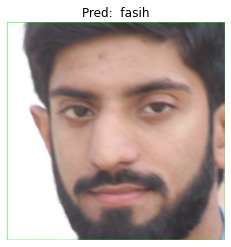

Label: mehraj
Label: arslan


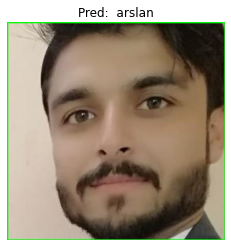

Label: mehraj
Label: mehraj


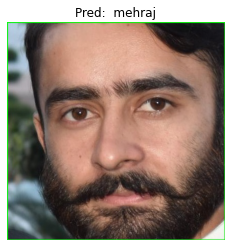

Label: mehraj
Label: fasih


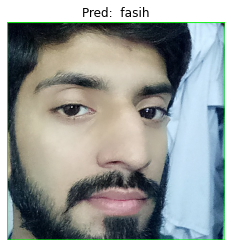

Label: mehraj
Label: mehraj


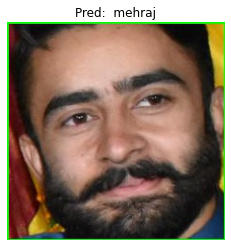

Label: mehraj
Label: fasih


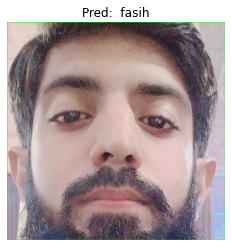

Label: mehraj
Label: fasih


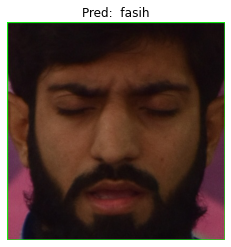

Label: mehraj
Label: fasih


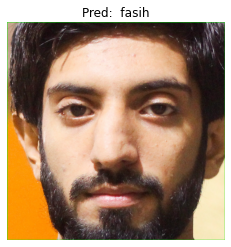

True 1:  7
False 1:  11
True 2:  7
False 2:  11
True 3:  4
False 3:  14


In [21]:
 import os
import cv2 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt # for visualizations
import matplotlib.image as mpimg
from PIL import Image
img_width, img_height = 64, 64


def predict(file):
  x = load_img(file, target_size=(img_width,img_height))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  answer = np.argmax(result)
  label = ''
  if answer == 0:
    print("Label: arslan")
    label= 'arslan'
  elif answer == 1:
    print("Label: fasih")
    label= 'fasih'
    #cv2.imshow(file)
  elif answer == 2:
    label = 'mehraj'
    print("Label: mehraj")
    #cv2.imshow(file)
  img = mpimg.imread(file)
    #img = cv2.resize(file,(64, 64),interpolation = cv.INTER_CUBIC)
  plt.imshow(img)
  plt.title("Pred:  "+label )
  plt.axis('off')
  plt.show()
  return answer

arslan_t = 0
arslan_f = 0
fasih_t = 0
fasih_f = 0
mehraj_t = 0
mehraj_f = 0

for i, ret in enumerate(os.walk('drive/new/')):
  for i, filename in enumerate(ret[2]):
    if filename.startswith("."):
      continue
    print("Label: arslan " +' Orignal '+ filename)
    result = predict(ret[0] + '/' + filename)
    if result == 0:
      arslan_t += 1
    else:
      arslan_f += 1

for i, ret in enumerate(os.walk('drive/new/')):
  for i, filename in enumerate(ret[2]):
    if filename.startswith("."):
      continue
    print("Label: fasih")
    result = predict(ret[0] + '/' + filename)
    
    if result == 1:
      fasih_t += 1
    else:
      fasih_f += 1

for i, ret in enumerate(os.walk('drive/new/')):
  for i, filename in enumerate(ret[2]):
    if filename.startswith("."):
      continue
    print("Label: mehraj")
    result = predict(ret[0] + '/' + filename)
    if result == 2:
      mehraj_t += 1
    else:
      mehraj_f += 1

"""
Check metrics
"""
print("True 1: ", arslan_t)
print("False 1: ", arslan_f)
print("True 2: ", fasih_t)
print("False 2: ", fasih_f)
print("True 3: ", mehraj_t)
print("False 3: ", mehraj_f)